In [1]:
# for this to work, need to make sure to launch jupyter-lab from the executable inside the venv
# like so:
# /home/dmarx/projects/ComfyUI/_venv/bin/jupyter-lab --port 8888 --ip 0.0.0.0 --ServerApp.token=$JUPYTER_TOKEN --no-browser

import os
import random
import sys
from typing import Sequence, Mapping, Any, Union
import torch


def get_value_at_index(obj: Union[Sequence, Mapping], index: int) -> Any:
    """Returns the value at the given index of a sequence or mapping.

    If the object is a sequence (like list or string), returns the value at the given index.
    If the object is a mapping (like a dictionary), returns the value at the index-th key.

    Some return a dictionary, in these cases, we look for the "results" key

    Args:
        obj (Union[Sequence, Mapping]): The object to retrieve the value from.
        index (int): The index of the value to retrieve.

    Returns:
        Any: The value at the given index.

    Raises:
        IndexError: If the index is out of bounds for the object and the object is not a mapping.
    """
    try:
        return obj[index]
    except KeyError:
        return obj["result"][index]


def find_path(name: str, path: str = None) -> str:
    """
    Recursively looks at parent folders starting from the given path until it finds the given name.
    Returns the path as a Path object if found, or None otherwise.
    """
    # If no path is given, use the current working directory
    if path is None:
        path = os.getcwd()

    # Check if the current directory contains the name
    if name in os.listdir(path):
        path_name = os.path.join(path, name)
        print(f"{name} found: {path_name}")
        return path_name

    # Get the parent directory
    parent_directory = os.path.dirname(path)

    # If the parent directory is the same as the current directory, we've reached the root and stop the search
    if parent_directory == path:
        return None

    # Recursively call the function with the parent directory
    return find_path(name, parent_directory)


def add_comfyui_directory_to_sys_path() -> None:
    """
    Add 'ComfyUI' to the sys.path
    """
    comfyui_path = find_path("ComfyUI") # just specify this explicitly, sheesh. environment variable.
    if comfyui_path is not None and os.path.isdir(comfyui_path):
        sys.path.append(comfyui_path)
        print(f"'{comfyui_path}' added to sys.path")


# The issue here is that main.py assumes we're running from the CLI
# def add_extra_model_paths() -> None:
# #async def add_extra_model_paths() -> None:
#     """
#     Parse the optional extra_model_paths.yaml file and add the parsed paths to the sys.path.
#     """
#     from main import load_extra_path_config

#     extra_model_paths = find_path("extra_model_paths.yaml")

#     if extra_model_paths is not None:
#         load_extra_path_config(extra_model_paths)
#     else:
#         print("Could not find the extra_model_paths config file.")


add_comfyui_directory_to_sys_path()
#add_extra_model_paths()
#await add_extra_model_paths()


# def import_custom_nodes() -> None:
#     """Find all custom nodes in the custom_nodes folder and add those node objects to NODE_CLASS_MAPPINGS

#     This function sets up a new asyncio event loop, initializes the PromptServer,
#     creates a PromptQueue, and initializes the custom nodes.
#     """
#     import asyncio
#     import execution
#     from nodes import init_custom_nodes
#     import server

#     # Creating a new event loop and setting it as the default loop
#     loop = asyncio.new_event_loop()
#     asyncio.set_event_loop(loop)

#     # Creating an instance of PromptServer with the loop
#     server_instance = server.PromptServer(loop)
#     execution.PromptQueue(server_instance)

#     # Initializing custom nodes
#     init_custom_nodes()


#from nodes import NODE_CLASS_MAPPINGS, SaveImage
#import_custom_nodes()

ComfyUI found: /home/dmarx/projects/ComfyUI
'/home/dmarx/projects/ComfyUI' added to sys.path


In [2]:
import asyncio


from comfy.options import enable_args_parsing
enable_args_parsing(False)

import server # hrm
import execution
from nodes import init_custom_nodes
from nodes import NODE_CLASS_MAPPINGS, SaveImage

### a bunch of node packs won't load correctly if PromptServer.instance doesn't exist

loop = asyncio.get_event_loop()
server_instance = server.PromptServer(loop)

# maybe this isn't needed?
execution.PromptQueue(server_instance)
init_custom_nodes()



Total VRAM 24260 MB, total RAM 31954 MB
Set vram state to: NORMAL_VRAM
Device: cuda:0 NVIDIA GeForce RTX 3090 : native
VAE dtype: torch.bfloat16


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using pytorch cross attention
Package diffusers is already installed.
Traceback (most recent call last):
  File "/home/dmarx/projects/ComfyUI/nodes.py", line 1735, in load_custom_node
    module_spec.loader.exec_module(module)
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_NestedNodeBuilder/__init__.py", line 97, in <module>
    @server.PromptServer.instance.routes.get('/nested_node_builder/nested_defs')
AttributeError: type object 'PromptServer' has no attribute 'instance'

Cannot import /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_NestedNodeBuilder module for custom nodes: type object 'PromptServer' has no attribute 'instance'
### Loading: ComfyUI-Manager (V0.40)
### ComfyUI Revision: 1652 [656c0b5d] | Released on '2023-11-06'
Traceback (most recent call last):
  File "/home/dmarx/projects/ComfyUI/nodes.py", line 1735

/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
[comfy_mtb] | INFO -> loaded 52 nodes successfuly
[comfy_mtb] | INFO -> Some nodes (7) could not be loaded. This can be ignored, but go to http://127.0.0.1:8188/mtb if you want more information.


WAS Node Suite: OpenCV Python FFMPEG support is enabled
WAS Node Suite Warning: `ffmpeg_bin_path` is not set in `/home/dmarx/projects/ComfyUI/custom_nodes/was-node-suite-comfyui/was_suite_config.json` config file. Will attempt to use system ffmpeg binaries if available.
WAS Node Suite: Finished. Loaded 197 nodes successfully.

	"Art is not what you see, but what you make others see." - Edgar Degas


Import times for custom nodes:
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Noise
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Cutoff
   0.0 seconds (IMPORT FAILED): /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_FizzNodes
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-ricing
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/sd-dynamic-thresholding
   0.0 seconds (IMPORT FAILED): /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-OpenPose-Editor
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/LoRA-Merger-ComfyU

In [3]:
import sys
sys.path # this isn't the python it's supposed to be... OH RIGHT, i used the "jupylab" command. fml.

['/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-Frame-Interpolation',
 '/home/dmarx/projects/ComfyUI/custom_nodes/was-node-suite-comfyui/was_node_suite_comfyui',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-Custom-Scripts',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Comfyroll_CustomNodes/nodes/comfy',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Comfyroll_CustomNodes/nodes/comfy',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Comfyroll_CustomNodes/nodes/comfy',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Comfyroll_CustomNodes/nodes/comfy',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_controlnet_aux/src/controlnet_aux',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_controlnet_aux/src/custom_detectron2',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_controlnet_aux/src/__init__.py',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_controlnet_aux/src/custom_midas_repo',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_contro

In [4]:
with torch.inference_mode():
    ### "imports"
    clipseg = NODE_CLASS_MAPPINGS["CLIPSeg"]()
    image_load = NODE_CLASS_MAPPINGS["Image Load"]()
    mediapipe_facemeshpreprocessor = NODE_CLASS_MAPPINGS[
        "MediaPipe-FaceMeshPreprocessor"
    ]()
    mediapipefacemeshtosegs = NODE_CLASS_MAPPINGS["MediaPipeFaceMeshToSEGS"]()
    segstocombinedmask = NODE_CLASS_MAPPINGS["SegsToCombinedMask"]()
    masktoimage = NODE_CLASS_MAPPINGS["MaskToImage"]()
    masktosegs = NODE_CLASS_MAPPINGS["MaskToSEGS"]()
    samdetectorcombined = NODE_CLASS_MAPPINGS["SAMDetectorCombined"]()
    invertmask = NODE_CLASS_MAPPINGS["InvertMask"]()
    impactdilatemask = NODE_CLASS_MAPPINGS["ImpactDilateMask"]()
    subtractmask = NODE_CLASS_MAPPINGS["SubtractMask"]()
    imagecompositemasked = NODE_CLASS_MAPPINGS["ImageCompositeMasked"]()
    #image_color_palette = NODE_CLASS_MAPPINGS["Image Color Palette"]()
    imageblur = NODE_CLASS_MAPPINGS["ImageBlur"]()
    imagesharpen = NODE_CLASS_MAPPINGS["ImageSharpen"]()
    imagetomask = NODE_CLASS_MAPPINGS["ImageToMask"]()
    tobinarymask = NODE_CLASS_MAPPINGS["ToBinaryMask"]()
    samloader = NODE_CLASS_MAPPINGS["SAMLoader"]()
    saveimage = SaveImage()

    samloader_29 = samloader.load_model(
        model_name="sam_vit_b_01ec64.pth", device_mode="Prefer GPU"
    )

    #saveimage_82 = saveimage.save_images(filename_prefix="maskSkinTone")

    image_load_130 = image_load.load_image(
        image_path="/home/dmarx/projects/whats-in-a-name/images/a_photo_of_adele_portrait_photography_full_color_face_full_frame/1695441053_3.png",
        RGBA="false",
        filename_text_extension="true",
    )
    
    input_image_data = image_load_130[0]

Loads SAM model: /home/dmarx/projects/ComfyUI/models/sams/sam_vit_b_01ec64.pth (device:Prefer GPU)


In [5]:
with torch.inference_mode():
    ################
    # isolate face #
    ################
    
    #mediapipe_facemeshpreprocessor_11 = mediapipe_facemeshpreprocessor.detect(
    detected_facemesh = mediapipe_facemeshpreprocessor.detect(
        max_faces=10,
        min_confidence=0.5,
        resolution=512,
        image=input_image_data #get_value_at_index(image_load_130, 0),
    )[0]
    
    #mediapipefacemeshtosegs_28 = mediapipefacemeshtosegs.doit(
    face_segs = mediapipefacemeshtosegs.doit(
        crop_factor=3,
        bbox_fill=False,
        crop_min_size=50,
        drop_size=1,
        dilation=0,
        face=True,
        mouth=False,
        left_eyebrow=False,
        left_eye=False,
        left_pupil=False,
        right_eyebrow=False,
        right_eye=False,
        right_pupil=False,
        image=detected_facemesh
    )[0]
    
    #segstocombinedmask_25 = segstocombinedmask.doit(
    face_mask0 = segstocombinedmask.doit(
        segs=face_segs
    )[0]

# of Detected SEGS: 1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [6]:
with torch.inference_mode():
    ################
    # isolate hair #
    ################
    hair_clipseg = clipseg.segment_image(
                image=input_image_data,
                text="hair",
                blur=7,
                threshold=0.4,
                dilation_factor=4,
            )
    hair_mask0 = hair_clipseg[0] #clipseg_8[0]
    hair_segs = masktosegs.doit(
            combined=False,
            crop_factor=3,
            bbox_fill=False,
            drop_size=10,
            mask=hair_mask0,
        )[0]
    #samdetectorcombined_30 = samdetectorcombined.doit(
    hair_mask1 = samdetectorcombined.doit(
            detection_hint="center-1",
            dilation=0,
            threshold=0.93,
            bbox_expansion=0,
            mask_hint_threshold=0.7,
            mask_hint_use_negative="False",
            sam_model=samloader_29[0], #get_value_at_index(samloader_29, 0),
            segs=hair_segs, #get_value_at_index(masktosegs_32, 0),
            image=input_image_data, #get_value_at_index(image_load_130, 0),
        )[0]
    
    ### shrink the hair mask ### TODO: simplify
    invertmask_69 = invertmask.invert(
            mask=hair_mask1
        )[0]
    impactdilatemask_72 = impactdilatemask.doit(
            dilation=50, mask=invertmask_69
        )[0]
    #invertmask_73 = invertmask.invert(
    hair_mask2 = invertmask.invert(
            mask=impactdilatemask_72
        )[0]


    ### exclude face outline from hair mask
    ###  TODO: this doesn't need to be achieved through comfy
    #subtractmask_133 = subtractmask.doit(
    hair_mask3 = subtractmask.doit(
            mask1=hair_mask2, #get_value_at_index(invertmask_73, 0),
            mask2=face_mask0 #get_value_at_index(segstocombinedmask_25, 0),
        )[0]

    # masktoimage_134 = masktoimage.mask_to_image(
    #     mask=get_value_at_index(subtractmask_133, 0)
    # )

    # saveimage_83 = saveimage.save_images(
    #         filename_prefix="maskHair",
    #         images=get_value_at_index(masktoimage_134, 0),
    #     )

# of Detected SEGS: 1


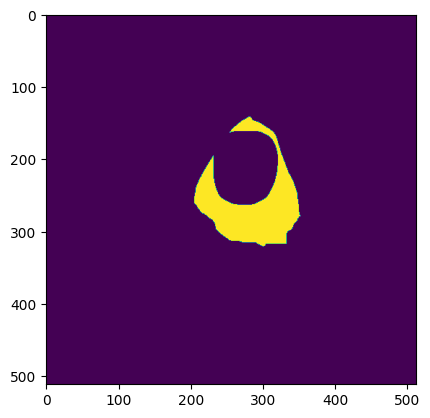

In [7]:
import matplotlib.pyplot as plt

plt.imshow(hair_mask3.detach().cpu())

In [9]:
with torch.inference_mode():
    ################
    # isolate skin #
    ################

    # face parts to ignore
    mediapipefacemeshtosegs_24 = mediapipefacemeshtosegs.doit(
        crop_factor=3,
        bbox_fill=True,
        crop_min_size=50,
        drop_size=1,
        dilation=0,
        face=False,
        mouth=True,
        left_eyebrow=True,
        left_eye=True,
        left_pupil=False,
        right_eyebrow=True,
        right_eye=True,
        right_pupil=False,
        #image=get_value_at_index(mediapipe_facemeshpreprocessor_11, 0),
        image=detected_facemesh,
    )[0]

    face_holes = segstocombinedmask.doit(
        segs=mediapipefacemeshtosegs_24
    )[0]

    # TO DO: shrink face before subtraction
    
    skin_mask0 = subtractmask.doit(
            mask1=face_mask0, #get_value_at_index(invertmask_73, 0),
            mask2=face_holes #get_value_at_index(segstocombinedmask_25, 0),
        )[0]

# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


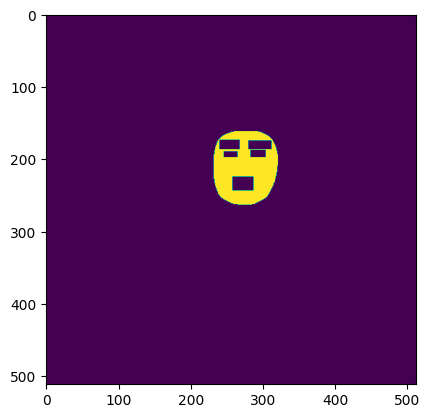

In [10]:
plt.imshow(skin_mask0.detach().cpu())

In [ ]:
### TODO: improve iris extraction by placing circles at locii given by pupil detection
# for now: face extraction is most of what i want anyway.

In [12]:
#%pip install colorspacious

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [13]:
from colorspacious import cspace_convert, cspace_converter

In [23]:
input_image_data[skin_mask0.unsqueeze(0)==1].shape

face_masked_cie = cspace_convert(input_image_data[skin_mask0.unsqueeze(0)==1], "sRGB1", "CIELab")
mu_cielab = face_masked_cie.mean(axis=0) # well, that sure is quite different.
mu_cielab

mu_rgb = cspace_convert(mu_cielab, "CIELab", "sRGB255")
mu_rgb = mu_rgb.round().astype('int')
print(mu_rgb)

[202 182 175]


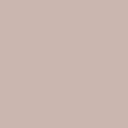

In [25]:
from PIL import Image
skin_tone = Image.new('RGB', (128,128))
skin_tone.paste( tuple(mu_rgb), (0, 0, skin_tone.size[0], skin_tone.size[1]))
skin_tone

In [ ]:
impath = "/home/dmarx/projects/whats-in-a-name/images/a_photo_of_adele_portrait_photography_full_color_face_full_frame/1695441053_3.png"

Image.open(impath)


# Refactored and cleaned up

In [1]:
def init_comfy(
    comfyui_path = "/home/dmarx/projects/ComfyUI"
):
    # 1. add ComyUI to path
    import sys
    sys.path.append(comfyui_path)

    # 2. ensure cli parser doesn't cause issues
    from comfy.options import enable_args_parsing
    enable_args_parsing(False)
    
    # 3. spin up custom nodes and prompt server
    import asyncio
    import server
    import execution
    from nodes import init_custom_nodes
    
    loop = asyncio.get_event_loop()
    server_instance = server.PromptServer(loop)
    execution.PromptQueue(server_instance)
    init_custom_nodes()

init_comfy()
from nodes import NODE_CLASS_MAPPINGS
import torch

Total VRAM 24260 MB, total RAM 31954 MB


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set vram state to: NORMAL_VRAM
Device: cuda:0 NVIDIA GeForce RTX 3090 : native
VAE dtype: torch.bfloat16
Using pytorch cross attention
Package diffusers is already installed.
### Loading: ComfyUI-Manager (V0.40)
### ComfyUI Revision: 1652 [656c0b5d] | Released on '2023-11-06'
Traceback (most recent call last):
  File "/home/dmarx/projects/ComfyUI/nodes.py", line 1735, in load_custom_node
    module_spec.loader.exec_module(module)
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_FizzNodes/__init__.py", line 14, in <module>
    extentions_folder = os.path.join(os.path.dirname(os.path.realpath(__main__.__file__)),
AttributeError: module '__main__' has no attribute '__file__'. Did you mean: '__name__'?

Cannot import /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_FizzNodes module for custom nodes: module '__main__' has no attri

/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
[comfy_mtb] | INFO -> loaded 52 nodes successfuly
[comfy_mtb] | INFO -> Some nodes (7) could not be loaded. This can be ignored, but go to http://127.0.0.1:8188/mtb if you want more information.


WAS Node Suite: OpenCV Python FFMPEG support is enabled
WAS Node Suite Warning: `ffmpeg_bin_path` is not set in `/home/dmarx/projects/ComfyUI/custom_nodes/was-node-suite-comfyui/was_suite_config.json` config file. Will attempt to use system ffmpeg binaries if available.
WAS Node Suite: Finished. Loaded 197 nodes successfully.

	"The future depends on what you do today." - Mahatma Gandhi


Import times for custom nodes:
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-ricing
   0.0 seconds (IMPORT FAILED): /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_FizzNodes
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/sd-dynamic-thresholding
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Noise
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Cutoff
   0.0 seconds (IMPORT FAILED): /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-OpenPose-Editor
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_NestedNodeBuilder
   

In [2]:
with torch.inference_mode():
    ### "imports"
    clipseg = NODE_CLASS_MAPPINGS["CLIPSeg"]()
    image_load = NODE_CLASS_MAPPINGS["Image Load"]()
    mediapipe_facemeshpreprocessor = NODE_CLASS_MAPPINGS[
        "MediaPipe-FaceMeshPreprocessor"
    ]()
    mediapipefacemeshtosegs = NODE_CLASS_MAPPINGS["MediaPipeFaceMeshToSEGS"]()
    segstocombinedmask = NODE_CLASS_MAPPINGS["SegsToCombinedMask"]()
    masktoimage = NODE_CLASS_MAPPINGS["MaskToImage"]()
    masktosegs = NODE_CLASS_MAPPINGS["MaskToSEGS"]()
    samdetectorcombined = NODE_CLASS_MAPPINGS["SAMDetectorCombined"]()
    invertmask = NODE_CLASS_MAPPINGS["InvertMask"]()
    impactdilatemask = NODE_CLASS_MAPPINGS["ImpactDilateMask"]()
    subtractmask = NODE_CLASS_MAPPINGS["SubtractMask"]()
    imagecompositemasked = NODE_CLASS_MAPPINGS["ImageCompositeMasked"]()
    #image_color_palette = NODE_CLASS_MAPPINGS["Image Color Palette"]()
    imageblur = NODE_CLASS_MAPPINGS["ImageBlur"]()
    imagesharpen = NODE_CLASS_MAPPINGS["ImageSharpen"]()
    imagetomask = NODE_CLASS_MAPPINGS["ImageToMask"]()
    tobinarymask = NODE_CLASS_MAPPINGS["ToBinaryMask"]()
    samloader = NODE_CLASS_MAPPINGS["SAMLoader"]()
    #saveimage = SaveImage()

    
    samloader_29 = samloader.load_model(
        model_name="sam_vit_b_01ec64.pth", device_mode="Prefer GPU"
    )

def masks_from_image(image: torch.tensor):
    """
    Returns masks (e.g. for skin, hair, eyes) for color analysis
    """
    input_image_data = image
    with torch.inference_mode():
        #mediapipe_facemeshpreprocessor_11 = mediapipe_facemeshpreprocessor.detect(
        detected_facemesh = mediapipe_facemeshpreprocessor.detect(
            max_faces=10,
            min_confidence=0.5,
            resolution=512,
            image=input_image_data #get_value_at_index(image_load_130, 0),
        )[0]

        def get_face():
            #mediapipefacemeshtosegs_28 = mediapipefacemeshtosegs.doit(
            face_segs = mediapipefacemeshtosegs.doit(
                crop_factor=3,
                bbox_fill=False,
                crop_min_size=50,
                drop_size=1,
                dilation=0,
                face=True,
                mouth=False,
                left_eyebrow=False,
                left_eye=False,
                left_pupil=False,
                right_eyebrow=False,
                right_eye=False,
                right_pupil=False,
                image=detected_facemesh
            )[0]
            
            #segstocombinedmask_25 = segstocombinedmask.doit(
            face_mask0 = segstocombinedmask.doit(
                segs=face_segs
            )[0]

            return face_mask0


        def get_hair():
    
            hair_clipseg = clipseg.segment_image(
                        image=input_image_data,
                        text="hair",
                        blur=7,
                        threshold=0.4,
                        dilation_factor=4,
                    )
            hair_mask0 = hair_clipseg[0] #clipseg_8[0]
            hair_segs = masktosegs.doit(
                    combined=False,
                    crop_factor=3,
                    bbox_fill=False,
                    drop_size=10,
                    mask=hair_mask0,
                )[0]
            #samdetectorcombined_30 = samdetectorcombined.doit(
            hair_mask1 = samdetectorcombined.doit(
                    detection_hint="center-1",
                    dilation=0,
                    threshold=0.93,
                    bbox_expansion=0,
                    mask_hint_threshold=0.7,
                    mask_hint_use_negative="False",
                    sam_model=samloader_29[0], #get_value_at_index(samloader_29, 0),
                    segs=hair_segs, #get_value_at_index(masktosegs_32, 0),
                    image=input_image_data, #get_value_at_index(image_load_130, 0),
                )[0]
            
            ### shrink the hair mask ### TODO: simplify
            invertmask_69 = invertmask.invert(
                    mask=hair_mask1
                )[0]
            impactdilatemask_72 = impactdilatemask.doit(
                    dilation=50, mask=invertmask_69
                )[0]
            #invertmask_73 = invertmask.invert(
            hair_mask2 = invertmask.invert(
                    mask=impactdilatemask_72
                )[0]
        
        
            ### exclude face outline from hair mask
            ###  TODO: this doesn't need to be achieved through comfy
            #subtractmask_133 = subtractmask.doit(
            face_mask0 = get_face()
            hair_mask3 = subtractmask.doit(
                    mask1=hair_mask2, #get_value_at_index(invertmask_73, 0),
                    mask2=face_mask0 #get_value_at_index(segstocombinedmask_25, 0),
                )[0]
        
            # masktoimage_134 = masktoimage.mask_to_image(
            #     mask=get_value_at_index(subtractmask_133, 0)
            # )
        
            # saveimage_83 = saveimage.save_images(
            #         filename_prefix="maskHair",
            #         images=get_value_at_index(masktoimage_134, 0),
            #     )

            return hair_mask3
        
        
        def get_skin():
            ################
            # isolate skin #
            ################
        
            # face parts to ignore
            mediapipefacemeshtosegs_24 = mediapipefacemeshtosegs.doit(
                crop_factor=3,
                bbox_fill=True,
                crop_min_size=50,
                drop_size=1,
                dilation=0,
                face=False,
                mouth=True,
                left_eyebrow=True,
                left_eye=True,
                left_pupil=False,
                right_eyebrow=True,
                right_eye=True,
                right_pupil=False,
                #image=get_value_at_index(mediapipe_facemeshpreprocessor_11, 0),
                image=detected_facemesh,
            )[0]
        
            face_holes = segstocombinedmask.doit(
                segs=mediapipefacemeshtosegs_24
            )[0]

            face_mask0 = get_face()
            # TO DO: shrink face before subtraction
            
            skin_mask0 = subtractmask.doit(
                    mask1=face_mask0, #get_value_at_index(invertmask_73, 0),
                    mask2=face_holes #get_value_at_index(segstocombinedmask_25, 0),
                )[0]
        
            ### TODO: improve iris extraction by placing circles at locii given by pupil detection
            # for now: face extraction is most of what i want anyway.

            return skin_mask0

    return {'hair':get_hair(), 'skin':get_skin(), 'left_eye':None, 'right_eye':None}

Loads SAM model: /home/dmarx/projects/ComfyUI/models/sams/sam_vit_b_01ec64.pth (device:Prefer GPU)


In [35]:
from colorspacious import cspace_convert, cspace_converter
from PIL import Image
import numpy as np

impath = "/home/dmarx/projects/whats-in-a-name/images/a_photo_of_adele_portrait_photography_full_color_face_full_frame/1695441053_3.png"
image = Image.open(impath)
image = cspace_convert(image, "sRGB255", "sRGB1")
# image.shape - torch.Size([1, 512, 512, 3])
image = np.expand_dims(image, axis=0) # add batch dimension
image = torch.tensor(image)
masks = masks_from_image(torch.tensor(image))

/tmp/ipykernel_447527/1749461252.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  masks = masks_from_image(torch.tensor(image))


# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


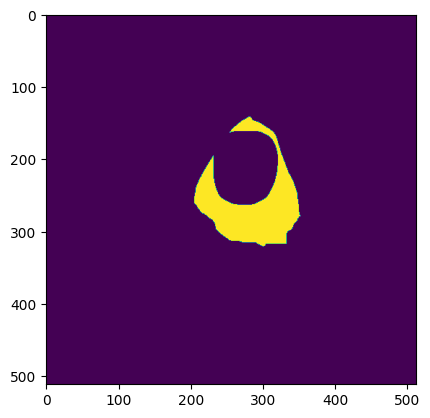

In [36]:
import matplotlib.pyplot as plt

plt.imshow(masks['hair'])

In [37]:
### Apply mask

### summarize color at mask

import sklearn
from sklearn.cluster import KMeans

def summarize_mask_color(image, mask, n_clusters=5, top_k=3):

    image[mask.unsqueeze(0)==1].shape
    
    masked_cie = cspace_convert(image[mask.unsqueeze(0)==1], "sRGB1", "CIELab")

    cluster_model = KMeans(n_clusters=n_clusters)
    y = cluster_model.fit_predict(masked_cie)
    cluster_metadata = {}
    luminances = []
    for cluster_id in range(n_clusters):
        idx = np.where(y==cluster_id)
        cluster_members = masked_cie[idx]
        mu_cluster = cluster_members.mean(axis=0)
        l,a,b = mu_cluster
        h = np.arctan(b/a)
        n = cluster_members.shape[0]
        cluster_metadata[cluster_id] = dict(
            cluster_id=cluster_id,
            n = n,
            l=l,
            h=h,
            lab=mu_cluster,
        )
        luminances.append(l)

    keepers = cluster_metadata
    if top_k > 0:
        m = n_clusters-top_k
        threshold = sorted(luminances)[::-1][-2]
        keepers = {k:v for k,v in cluster_metadata.items() if v['l'] > threshold}
        
    #total_pixels = sum(v['n'] for v in cluster_metadata.values())
    total_pixels = sum(v['n'] for v in keepers.values())
    
    mu_cielab = np.array([0,0,0])
    #for item in cluster_metadata.values():
    for item in keepers.values():
        weight = item['n'] / total_pixels
        mu_cielab = mu_cielab + weight * item['lab']
    
    #mu_cielab = masked_cie.mean(axis=0) # well, that sure is quite different.
    #mu_cielab
    
    mu_rgb = cspace_convert(mu_cielab, "CIELab", "sRGB255")
    mu_rgb = mu_rgb.round().astype('int')
    return {'mu_cielab':mu_cielab, 'mu_rgb':mu_rgb}

In [38]:
hair_tone = summarize_mask_color(image, masks['hair'])
skin_tone = summarize_mask_color(image, masks['skin'])

/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
hair_tone

{'mu_cielab': array([     67.519,      8.3367,      16.304]),
 'mu_rgb': array([190, 158, 136])}

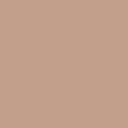

In [40]:
from PIL import Image
tile = Image.new('RGB', (128,128))
tile.paste( tuple(hair_tone['mu_rgb']), (0, 0, tile.size[0], tile.size[1]))
tile

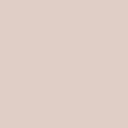

In [41]:
from PIL import Image
tile = Image.new('RGB', (128,128))
tile.paste( tuple(skin_tone['mu_rgb']), (0, 0, tile.size[0], tile.size[1]))
tile

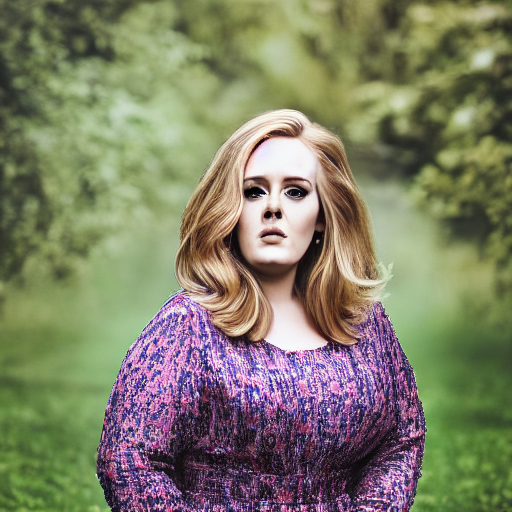

In [10]:
Image.open(impath)

In [42]:
from pathlib import Path
import random

pattern = "**/*.png"
root = "/home/dmarx/projects/whats-in-a-name/images/"
image_paths = Path(root).glob(pattern)

image_paths = list(image_paths)
random.shuffle(image_paths)

records = []

In [93]:
# let's sample images in folders and log their color stats to a dataframe.

random.shuffle(image_paths)

import pandas as pd

n = 200

for i, image_path in enumerate(image_paths[:n]):
    print((len(records),image_path))
    #subject_name = name_from_path(image_path)
    image = Image.open(image_path)
    image = cspace_convert(image, "sRGB255", "sRGB1")
    image = torch.tensor(image).unsqueeze(0)
    try:
        masks = masks_from_image(image)
        hair_tone = summarize_mask_color(image, masks['hair'])
        skin_tone = summarize_mask_color(image, masks['skin'])
        records.append((image_path, masks, {'hair':hair_tone, 'skin':skin_tone}))
    except KeyboardInterrupt:
        break
    except Exception as e:
        continue
    if len(records) > n:
        break

(152, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_lilly_portrait_photography_full_color_face_full_frame/1695506935_0.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(153, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_neymar_portrait_photography_full_color_face_full_frame/1695554585_5.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(154, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_roger_portrait_photography_full_color_face_full_frame/1695441641_1.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(155, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_lilly_portrait_photography_full_color_face_full_frame/1695544305_8.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(156, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_dwayne_portrait_photography_full_color_face_full_frame/1695551475_10.png'))
# of Detected SEGS: 4
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(157, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_celine_portrait_photography_full_color_face_full_frame/1695511833_0.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(158, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_bruce_portrait_photography_full_color_face_full_frame/1695538392_2.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(159, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_rush_portrait_photography_full_color_face_full_frame/1695443728_5.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(160, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_justin_portrait_photography_full_color_face_full_frame/1695547300_10.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(161, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_meera_portrait_photography_full_color_face_full_frame/1695516879_7.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(162, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_jerry_portrait_photography_full_color_face_full_frame/1695503777_3.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
(162, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_dennis_portrait_photography_full_color_face_full_frame/1695515229_6.png'))
# of Detected SEGS: 6
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
(162, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_brad_portrait_photography_full_color_face_full_frame/1695503513_7.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(163, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_iko_portrait_photography_full_color_face_full_frame/1695515719_1.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(164, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_celina_portrait_photography_full_color_face_full_frame/1695540597_6.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(165, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_kobe_portrait_photography_full_color_face_full_frame/1695545452_10.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
(165, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_james_portrait_photography_full_color_face_full_frame/1695515351_6.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(166, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_tyler_portrait_photography_full_color_face_full_frame/1695442509_1.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(167, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_brad_portrait_photography_full_color_face_full_frame/1695439832_3.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(168, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_jaycee_portrait_photography_full_color_face_full_frame/1695546011_8.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(169, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_mel_portrait_photography_full_color_face_full_frame/1695509011_4.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(170, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_lady_portrait_photography_full_color_face_full_frame/1695447339_2.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(171, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_neymar_portrait_photography_full_color_face_full_frame/1695554660_11.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(172, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_tom_portrait_photography_full_color_face_full_frame/1695513827_0.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(173, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_geraldine_portrait_photography_full_color_face_full_frame/1695510556_3.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(174, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_nadia_portrait_photography_full_color_face_full_frame/1695440979_6.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(175, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_sandra_portrait_photography_full_color_face_full_frame/1695549908_2.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(176, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_justin_portrait_photography_full_color_face_full_frame/1695443532_3.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(177, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_tony_portrait_photography_full_color_face_full_frame/1695548701_7.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(178, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_tony_portrait_photography_full_color_face_full_frame/1695440695_0.png'))
# of Detected SEGS: 1
(178, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_anupam_portrait_photography_full_color_face_full_frame/1695490684_0.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(179, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_parminder_portrait_photography_full_color_face_full_frame/1695546228_0.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(180, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_anne_portrait_photography_full_color_face_full_frame/1695448206_6.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(181, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_dennis_portrait_photography_full_color_face_full_frame/1695545634_0.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(182, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_kim_portrait_photography_full_color_face_full_frame/1695543677_5.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
(182, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_brad_portrait_photography_full_color_face_full_frame/1695539732_2.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(183, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_judge_portrait_photography_full_color_face_full_frame/1695445060_1.png'))
No faces detected in controlnet image for Mediapipe face annotator.
# of Detected SEGS: 2
(183, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_adele_portrait_photography_full_color_face_full_frame/1695546746_2.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(184, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_johnny_portrait_photography_full_color_face_full_frame/1695558514_0.png'))
# of Detected SEGS: 3
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(185, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_rae_portrait_photography_full_color_face_full_frame/1695442306_1.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(186, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_adele_portrait_photography_full_color_face_full_frame/1695512373_2.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(187, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_taylor_portrait_photography_full_color_face_full_frame/1695548150_9.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(188, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_ed_portrait_photography_full_color_face_full_frame/1695509256_7.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
(188, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_kunal_portrait_photography_full_color_face_full_frame/1695554290_2.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(189, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_nina_portrait_photography_full_color_face_full_frame/1695507382_2.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(190, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_david_portrait_photography_full_color_face_full_frame/1695554809_6.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(191, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_julia_portrait_photography_full_color_face_full_frame/1695543273_7.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(192, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_leonardo_portrait_photography_full_color_face_full_frame/1695440239_4.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(193, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_dante_portrait_photography_full_color_face_full_frame/1695444713_1.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(194, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_anupam_portrait_photography_full_color_face_full_frame/1695448354_6.png'))
# of Detected SEGS: 3
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(195, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_yuvraj_portrait_photography_full_color_face_full_frame/1695543490_2.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(196, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_kelly_portrait_photography_full_color_face_full_frame/1695558955_1.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(197, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_lou_portrait_photography_full_color_face_full_frame/1695549508_11.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(198, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_kelly_portrait_photography_full_color_face_full_frame/1695558882_4.png'))
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(199, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_jaycee_portrait_photography_full_color_face_full_frame/1695510113_7.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(200, PosixPath('/home/dmarx/projects/whats-in-a-name/images/a_photo_of_tatyana_portrait_photography_full_color_face_full_frame/1695517813_5.png'))
# of Detected SEGS: 2
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [94]:
rows = []
for rec in records:
    fpath, masks, colors = rec
    prompt = fpath.parent.name
    skin_L, skin_a, skin_b = colors['skin']['mu_cielab']
    skin_R, skin_G, skin_B = colors['skin']['mu_rgb']
    if np.isnan(skin_L):
        continue
    rows.append((
        prompt,
        skin_L, skin_a, skin_b,
        skin_R, skin_G, skin_B
        ))
df = pd.DataFrame(rows)
df.columns = ['prompt', 'skin_L', 'skin_a', 'skin_b', 'skin_R', 'skin_G', 'skin_B']
df = df.dropna()

In [95]:
a, b = df['skin_a'].values, df['skin_b'].values
#df['skin_h'] = np.arctan2(b,a) 
df['skin_h'] = np.arctan(b/a) # yeah, no difference.

In [96]:
# https://stackoverflow.com/a/3380754/819544

def clamp(x): 
  return max(0, min(x, 255))

def get_hex_color(rec):
    r,g,b = rec['skin_R'], rec['skin_G'], rec['skin_B']
    return "#{0:02x}{1:02x}{2:02x}".format(clamp(r), clamp(g), clamp(b))

# https://python-graph-gallery.com/45-control-color-of-each-marker-seaborn/

In [97]:
df['hex_color'] = df.apply(get_hex_color, axis=1)

In [98]:
import seaborn as sns

/tmp/ipykernel_447527/2120540311.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c=rgb, #zorder=10


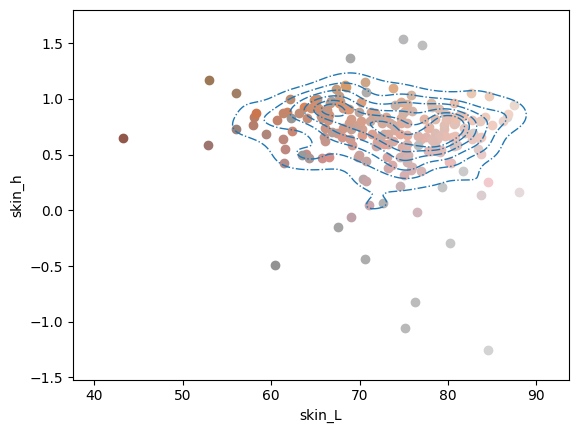

In [110]:
#sns.regplot(data=df, x="skin_L", y="skin_h", fit_reg=False, scatter_kws={'facecolors':df['hex_color'], 'alpha':1})
#sns.regplot(data=df, x="skin_L", y="skin_h", fit_reg=False, 
#            #scatter_kws={'facecolor':df['hex_color'],'bordercolor':df['hex_color']})
#            scatter_kws={'facecolor':df['hex_color']})

fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(data=df, x="skin_L", y="skin_h", ax=ax, alpha=1, 
            bw_adjust=.6, thresh=.15, levels=7,
            linestyles='dashdot', linewidths=1,
           )

for _, rec in df.iterrows():
    #break
    x,y = rec['skin_L'], rec['skin_h']
    rgb = (rec['skin_R']/255., rec['skin_G']/255., rec['skin_B']/255.)
    ax.scatter(x, y, c=rgb, #zorder=10
              )

plt.show()

/tmp/ipykernel_447527/1367872565.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c=rgb)


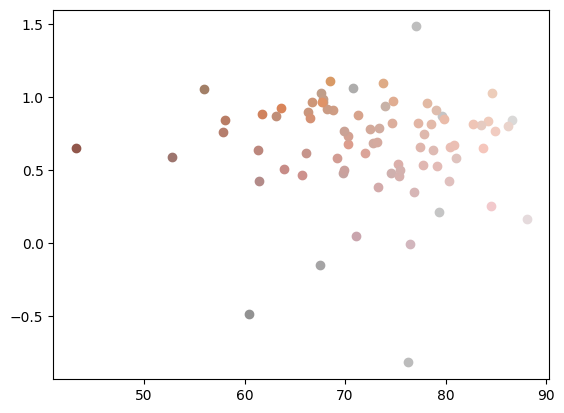

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

for _, rec in df.iterrows():
    #break
    x,y = rec['skin_L'], rec['skin_h']
    rgb = (rec['skin_R']/255., rec['skin_G']/255., rec['skin_B']/255.)
    ax.scatter(x, y, c=rgb)
plt.show()